In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([10,20,30,40,50])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [5]:
s[0]

10

In [6]:
sales = pd.Series([10,20,40,30,50], index= ['mon','tue','wed','thu','fri'])   # Custom index

In [7]:
sales

mon    10
tue    20
wed    40
thu    30
fri    50
dtype: int64

In [8]:
sales['fri']

50

In [9]:
sales[0]  # Position 

10

In [10]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [11]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [12]:
marks[101]

60

In [15]:
# marks[0]   # will throw error

In [16]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(11,21))

In [17]:
nums

11    18
12    60
13    99
14    38
15    38
16    23
17    69
18    45
19    42
20    93
dtype: int32

### Properties of Series

In [18]:
nums.is_unique

False

In [19]:
nums.axes

[Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')]

In [20]:
print(nums.index),
print(type(nums.index))

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>


In [21]:
print(nums.values, type(nums.values))

[18 60 99 38 38 23 69 45 42 93] <class 'numpy.ndarray'>


### loc and iloc properties

In [23]:
print(nums[11])      # Index or custom index 
print(nums.loc[11])  # Custom index 
print(nums.iloc[0])  # Position

18
18
18


In [24]:
# for loc end range is inclusive  
nums.loc[11:15]

11    18
12    60
13    99
14    38
15    38
dtype: int32

In [25]:
nums.iloc[0:5]   # for iloc it is exclusive 

11    18
12    60
13    99
14    38
15    38
dtype: int32

#### Fancy indexing

In [26]:
nums[ nums > 50 ]  # Boolean indexing

12    60
13    99
17    69
20    93
dtype: int32

In [27]:
nums.loc[[11,15,20]]

11    18
15    38
20    93
dtype: int32

In [28]:
nums.iloc[[0,4,6]]

11    18
15    38
17    69
dtype: int32

### Methods of Series 

In [29]:
nums.describe()

count    10.000000
mean     52.500000
std      27.443882
min      18.000000
25%      38.000000
50%      43.500000
75%      66.750000
max      99.000000
dtype: float64

In [30]:
summary = nums.describe()
print(type(summary))

<class 'pandas.core.series.Series'>


In [32]:
summary.loc['mean'], summary.loc['50%']

(52.5, 43.5)

In [33]:
nums.mean()

52.5

In [34]:
nums.index.is_unique

True

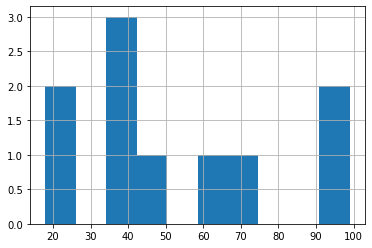

In [35]:
nums.hist()

### Iteration

In [36]:
for i,v in nums.items():
     print(f"{i} - {v}")

11 - 18
12 - 60
13 - 99
14 - 38
15 - 38
16 - 23
17 - 69
18 - 45
19 - 42
20 - 93


#### Ranking

In [4]:
marks = pd.Series([60,70,80,60,85,75])

In [38]:
marks.rank()

0    1.5
1    3.0
2    5.0
3    1.5
4    6.0
5    4.0
dtype: float64

In [39]:
marks.rank(ascending=False)

0    5.5
1    4.0
2    2.0
3    5.5
4    1.0
5    3.0
dtype: float64

In [51]:
marks.rank(method='min')

0    1.0
1    3.0
2    5.0
3    1.0
4    6.0
5    4.0
dtype: float64

In [52]:
marks.rank(method='dense')

0    1.0
1    2.0
2    4.0
3    1.0
4    5.0
5    3.0
dtype: float64

In [40]:
marks.rank(method='dense', ascending=False)

0    5.0
1    4.0
2    2.0
3    5.0
4    1.0
5    3.0
dtype: float64

### Selecting rows

In [54]:
marks.head()

0    60
1    70
2    80
3    60
4    85
dtype: int64

In [55]:
marks.tail(3)

3    60
4    85
5    75
dtype: int64

In [3]:
pd.Series([10,20,30,15,30]).pct_change() * 100

0      NaN
1    100.0
2     50.0
3    -50.0
4    100.0
dtype: float64

In [59]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [5]:
marks.quantile(.25)

62.5

In [6]:
marks.quantile([.25,.75])

0.25    62.50
0.75    78.75
dtype: float64

In [7]:
marks.agg(['min','max','sum','mean'])

min      60.000000
max      85.000000
sum     430.000000
mean     71.666667
dtype: float64

In [64]:
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [65]:
marks.apply(get_grade)

0    C
1    B
2    B
3    C
4    A
5    B
dtype: object

In [67]:
for v in map(get_grade,marks):
     print(v)

C
B
B
C
A
B


In [8]:
marks.apply(lambda v : 'Pass' if v > 60 else 'Fail')

0    Fail
1    Pass
2    Pass
3    Fail
4    Pass
5    Pass
dtype: object

In [9]:
marks.count()

6

In [10]:
marks.sort_values(ascending=False)[:3]

4    85
2    80
5    75
dtype: int64

In [44]:
smarks = marks.sort_values(ascending=False)

In [45]:
smarks.head(3)

4    85
2    80
5    75
dtype: int64

In [46]:
smarks.tail(3)

1    70
3    60
0    60
dtype: int64

#### Saving series

In [11]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  ="Units"
sales.index.name = "Month"

In [12]:
sales

Month
1    100
2    120
3    150
4    100
5    200
Name: Units, dtype: int64

In [13]:
sales.to_csv("sales.csv")

In [14]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [15]:
sales.value_counts()

100    2
150    1
200    1
120    1
Name: Units, dtype: int64

### Handle null (na, nan) values

In [16]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100), 
                   index  = np.arange(1,11))
sales.name  ="Units"
sales.index.name = "Month"

In [17]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [18]:
sales.isnull()    # sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
Name: Units, dtype: bool

In [19]:
sales.isna().value_counts()

False    8
True     2
Name: Units, dtype: int64

In [20]:
sales.isna().sum()     # Count NA values 

2

In [21]:
sales.fillna(0)

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       0.0
7     175.0
8       0.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [11]:
sales.dropna()  # inplace=True will modify sales inplace 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [9]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [22]:
sales.fillna(sales.mean())

Month
1     100.000
2     120.000
3     150.000
4     100.000
5     200.000
6     143.125
7     175.000
8     143.125
9     200.000
10    100.000
Name: Units, dtype: float64